a = 4.299995706333222
b = 15.00354135256373


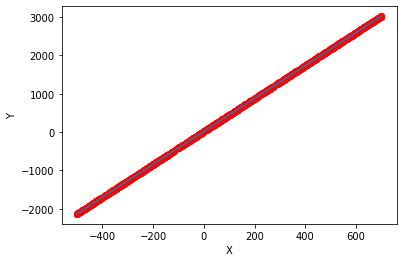

validate: 0.0046901592208301235


In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class LinearRegression:
    def __init__(self):
        self.weights = 0
        self.bias = 0
        self.NUM_LOOPs = 1000

    def train(self, X, Y):
        X = X.reshape(-1, 1)
        Y = Y.reshape(-1, 1)
        # Building Xbar 
        one = np.ones((X.shape[0], 1))
        Xbar = np.concatenate((one, X), axis = 1)

        # Calculating weights of the fitting line 
        A = np.dot(Xbar.T, Xbar)
        b = np.dot(Xbar.T, Y)
        w = np.dot(np.linalg.pinv(A), b)
        #print('w = ', w)

        self.bias, self.weights =  w[0][0], w[1][0] 
        print('a = {}'.format(self.weights))
        print('b = {}'.format(self.bias))

    
    def validate(self, X, Y):
         # Building Xbar 
        one = np.ones((X.shape[0], 1))
        Xbar = np.concatenate((one, X), axis = 1)
        
        w = np.array([self.bias, self.weights]).reshape(-1, 1)
        N = Xbar.shape[0]        
        f = ((np.sum((np.dot(Xbar, w) - Y) ** 2)) * 0.5) / N
        return f
    
    
    
    def plot(self, X, Y):
        x0 = np.linspace(X.min(), X.max(), 3)
        y0 = self.bias + self.weights*x0
        
        
        plt.scatter(X,Y, color = 'red')
        #array_x = np.arange(0, 2)
        #array_y = array_x * a + b
        #plt.plot(array_x, array_y)

        #plt.plot(X.T, Y.T, 'ro')     # data 
        plt.plot(x0, y0)              # the fitting line
        #plt.axis([140, 190, 45, 75])

        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()
        
# to test
X = np.random.randint(-500, 700, size =(1000, 1))
Y = 15 + 4.3 * X + .2*np.random.normal(0, 0.5, size = (1000, 1)) # noise added

model = LinearRegression()
model.train(X, Y)
model.plot(X, Y)
print('validate: {}'.format(model.validate(X, Y)))

a = 4.299971843217163
b = 15.069455874809002
Solution found by Gradient Descent: w = 15.069455874809002, 4.299971843217163 after 22 iterations


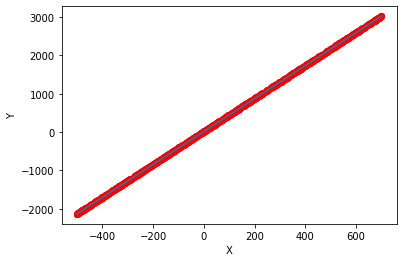

validate: 0.007682033332855676


In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class LinearRegression02:
    def __init__(self):
        self.weights = 0
        self.bias = 0
        
        self.__NUM_LOOPs = 1000
        self.__eta = 0.1

        
    def train(self, X, Y):
        ncount = 0
        w0_0, w0_1 = self.__find_init(X, Y)
        w0 = np.array([w0_0, w0_1]).reshape(-1, 1)

        for i in range(10):  
            (w, it1, count) = self.__find_min_point(w0, self.__eta, X)

            ncount = ncount + count

            if (it1 >= self.__NUM_LOOPs):
                #try to update learning rate
                self.__eta = self.__eta / 10
            else:    
                break
        w0, w1 = w[0][0], w[1][0]
        
        self.bias = w0
        self.weights = w1
        
        print('a = {}'.format(w1))
        print('b = {}'.format(w0))
        print('Solution found by Gradient Descent: w = {}, {} after {} iterations'.format(w0, w1, ncount))
               

    
    def validate(self, X, Y):
         # Building Xbar 
        one = np.ones((X.shape[0], 1))
        Xbar = np.concatenate((one, X), axis = 1)
        
        w = np.array([self.bias, self.weights]).reshape(-1, 1)
        N = Xbar.shape[0]        
        f = ((np.sum((np.dot(Xbar, w) - Y) ** 2)) * 0.5) / N
        return f
    
    
    
    def plot(self, X, Y):
        x0 = np.linspace(X.min(), X.max(), 3)
        y0 = self.bias + self.weights*x0
        
        
        plt.scatter(X,Y, color = 'red')
        plt.plot(x0, y0)              # the fitting line

        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()
     
    def __calculate_Xbar(self, X):
        one = np.ones((X.shape[0], 1))
        Xbar = np.concatenate((one, X), axis = 1)
        return Xbar
    
    
    
    def __f(self, w, X):
        Xbar = self.__calculate_Xbar(X) 
        #               
        N = Xbar.shape[0]
        f = ((np.sum((np.dot(Xbar, w) - Y) ** 2)) * 0.5) / N
        return f

    def __numerical_grad(self, w, X):
        eps = 1e-4
        g = np.zeros_like(w)
        for i in range(len(w)):
            w_p = w.copy()
            w_n = w.copy()
            #
            w_p[i] += eps 
            w_n[i] -= eps
            g[i] = (self.__f(w_p, X) - self.__f(w_n, X))/(2*eps)
        return g 


    def __grad(self, w, X):
        return self.__numerical_grad(w, X)
    
    # Hàm tìm theta đầu tiên, thường lấy 2 điểm đầu và cuối
    def __find_init(self, X, Y):
        x_min_idx  = np.argmin(X)
        x_max_idx = np.argmax(X)
        #
        x1, y1, x2, y2 = X[x_min_idx], Y[x_min_idx], X[x_max_idx], Y[x_max_idx]

        z1 = np.array([x1, y1])
        z2 = np.array([x2, y2])
        z3 = z2 - z1

        # find a
        w1 = 0.0
        if (z3[0] > 0):
            w1 = z3[1] / z3[0]

        #find b
        w0_0 = Y[x_min_idx] - w1*X[x_min_idx]
        w0_1 = Y[x_max_idx] - w1*X[x_max_idx]
        w0 = (w0_0 + w0_1) / 2
        #w0 = np.mean(Y - w1[0]*X)

        return w0, w1
    
    def __find_min_point(self, w0, eta, X):
        #1. khởi tạo list x
        w = w0.copy()
        count = 0
        #2. chạy vòng lặp for (0..NUM_LOOPs)

        for it in range(self.__NUM_LOOPs):

            w_new = w - eta*self.__grad(w, X) 

            n = abs(np.linalg.norm(self.__grad(w_new, X)) - np.linalg.norm(self.__grad(w, X)))
            if (n > 1e+10):
                it = self.__NUM_LOOPs # to exit
                break

            if (n < 1e-3):
                break

            #2.3 copy back    
            w = w_new.copy()
            count = count + 1
        return (w, it, count)    

    
    
# to test:
X = np.random.randint(-500, 700, size =(1000, 1))
Y = 15 + 4.3 * X + .2*np.random.normal(0, 0.5, size = (1000, 1)) # noise added

model02 = LinearRegression02()
model02.train(X, Y)
model02.plot(X, Y)
print('validate: {}'.format(model02.validate(X, Y)))